This notebook looks into the simulated datasets in some detail.

In [1]:
# %matplotlib qt 
%matplotlib inline

In [2]:
# import matplotlib
# #matplotlib.use('Qt4Agg')
# matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [3]:
#%matplotlib qt
import hyperspy.api as hs
import numpy as np
import os
import h5py
import sys

In [4]:
sys.path.append('/dls/science/groups/e02/Mohsen/code/Git_Repos/Merlin-Medipix/')
import epsic_tools.api as epsic

Reading the data

In [5]:
sim_root_path = '/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_amC_16June2020_512pixArray/'
sim_paths = []
sim_names = []
for dirname, dirnames, filenames in os.walk(sim_root_path):
    for filename in filenames:
        if filename.endswith('.h5'):
            sim_paths.append(os.path.join(dirname, filename))
            sim_names.append(filename)

checking different convergence semi-angles

In [6]:
sim_names.sort()
sim_paths.sort()

In [7]:
for i, file in enumerate(sim_names):
    print('[',i,']', file)

[ 0 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_14.08A_step_size.h5
[ 1 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_18.41A_step_size.h5
[ 2 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_2.17A_step_size.h5
[ 3 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_20.58A_step_size.h5
[ 4 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_21.66A_step_size.h5
[ 5 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_4.33A_step_size.h5
[ 6 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_6.50A_step_size.h5
[ 7 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_8.66A_step_size.h5
[ 8 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_14.09A_step_size.h5
[ 9 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_18.42A_step_size.h5
[ 10 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_2.17A_step_size.h5
[ 11 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_20.59A_step_size.h5
[ 12 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_21.67A_step_size.h5
[ 13 ] amorCarbon_43p5nmCube_12.0mrad_244.21A_def_4.33A_step_size.h5
[ 14 ] amorCarbon_43p5nmCube_12.0mra

In [8]:
def_8mrad = []
def_10mrad = []
def_12mrad = []
def_15mrad = []
def_20mrad = []
def_25mrad = []
def_32mrad = []
def_42mrad = []
for sim in sim_paths:
    if '8.0mrad' in sim:
        def_8mrad.append(sim)
    if '10.0mrad' in sim:
        def_10mrad.append(sim)
    if '12.0mrad' in sim:
        def_12mrad.append(sim)
    if '15.0mrad' in sim:
        def_15mrad.append(sim)
    if '20.0mrad' in sim:
        def_20mrad.append(sim)
    if '25.0mrad' in sim:
        def_25mrad.append(sim)
    if '32.0mrad' in sim:
        def_32mrad.append(sim)
    if '42.0mrad' in sim:
        def_42mrad.append(sim)

In [9]:
sum_dp = []
scan_sizes = [] 
conv_array = [def_8mrad[0], def_10mrad[0], def_12mrad[0], def_15mrad[0], def_20mrad[0], def_25mrad[0], def_32mrad[0], def_42mrad[0]]
for data in conv_array:
    d = epsic.sim_utils.sim_to_hs(data)
    d_sum = d.sum()
    sum_dp.append(d_sum.data)
sum_dp = hs.signals.Signal2D(sum_dp)

Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)


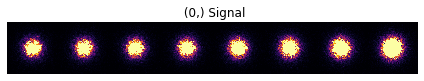

In [10]:
collage = hs.stack([image for image in sum_dp], axis=0)
collage.plot(colorbar=False, scalebar=False, axes_off = True, vmax = 150, cmap = 'inferno')

In [11]:
pixel_size = 8.5048828125e-12
detector_pix_array = 512
image_size = [detector_pix_array, detector_pix_array]
l = epsic.ptycho_utils.e_lambda(80000)
detector_pixel_size = 55e-6 

In [12]:

sampling_factors = []
for i, file in enumerate(sim_names):
    conv_semi = float(sim_names[i].split('_')[-6][:-4])*1e-3
    defocus = float(sim_names[i].split('_')[-5][:-1])*1e-10
    step_size = float(sim_names[i].split('_')[-3][:-1])*1e-10

    rad, probe = epsic.sim_utils.calc_probe_size(pixel_size, image_size, l, defocus, conv_semi, plot_probe=False, return_probeArr=True)
    n_pix = probe.shape[0]
    d = epsic.sim_utils.sim_to_hs(sim_paths[i])
    scan_size = list(d.data.shape[:2])
    n = scan_size[0]
    print('(',pixel_size * n_pix, 2*rad, n, step_size, ')')
#         print(2*rad)
#         print(n)
#         print(step_size)
    s_factor = epsic.ptycho_utils.get_sampling_factor(pixel_size * n_pix, 2*rad, n, step_size)

    print('[',i,']', file, ' ', s_factor)
    sampling_factors.append(s_factor)


Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 2 1.408e-09 )
[ 0 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_14.08A_step_size.h5   1.2187471557216323
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 2 1.8410000000000002e-09 )
[ 1 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_18.41A_step_size.h5   1.0870131184362333
Dataset shape is (13, 13, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 13 2.17e-10 )
[ 2 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_2.17A_step_size.h5   5.935134631863452
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 2 2.0579999999999997e-09 )
[ 3 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_20.58A_step_size.h5   1.0311557474532775
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 2 2.166e-09 )
[ 4 ] amorCarbon_43p5nmCube_10.0mrad_260.46A_def_21.66A_step_size.h5   1.0054419205542358
Dataset shape is (7, 7, 512, 512)
( 4.3545e-09 2.1649314153120275e-09 7 4.33e-10 )
[ 5 ] amorCarbon_43p5

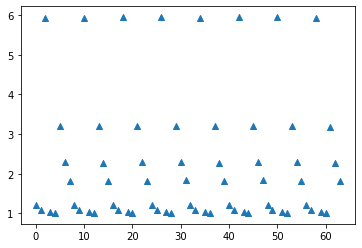

In [13]:
import matplotlib.pyplot as plt
plt.figure()
# plt.scatter(np.arange(len(sampling_factors_def)),sampling_factors_foc, marker='o', label='focussed')
plt.scatter(np.arange(len(sampling_factors)),sampling_factors, marker='^')
